In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Задача 1


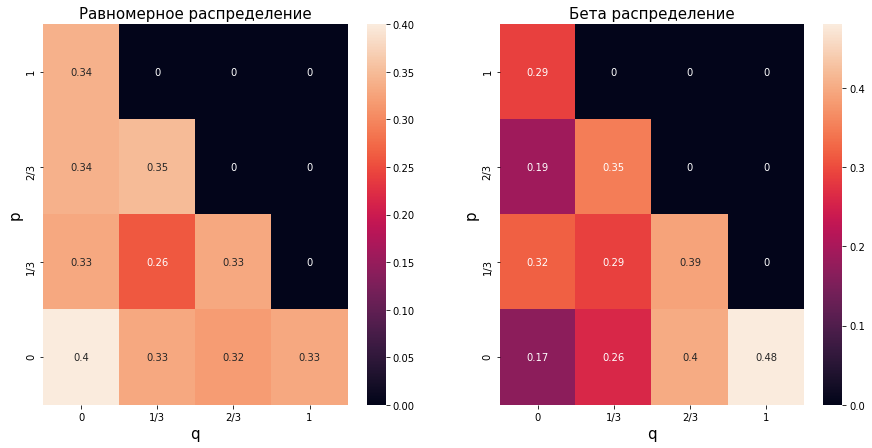

In [2]:
def winner(x,y):
    "Функция определения победителя, возвращает 1 если победил 1 игрок, иначе возвращает 0"
    if((x=='к' and y =='н') or (x=='н' and y=='б') or (x=='б' and y =='к')):
        return 1
    return 0  

n = 100 # Количество симуляций
pvec = np.linspace(0,1,4) 
qvec = np.linspace(0,1,4)
pn,qn = len(pvec),len(qvec)
results = np.zeros((2,pn,qn,n)) # Результаты симуляций

for i in range(pn):
    for j in range(pn):
        p,q = pvec[i],qvec[j]
        if(p+q<=1):
            N1 = np.random.uniform(low = 0, high = 1, size = (2,n))
            N2 = np.random.beta(a = 1, b = 2, size = (2,n))
            X = np.random.choice(['к','н','б'],size = n,p = [p, q, 1-p-q])
            Y1 = [np.random.choice(['к','н','б'],size = 1,p = [min(n1,n2), abs(n1-n2),1-max(n1,n2)]) for n1,n2 in zip(N1[0],N1[1])]
            Y2 = [np.random.choice(['к','н','б'],size = 1,p = [min(n1,n2), abs(n1-n2),1-max(n1,n2)]) for n1,n2 in zip(N2[0],N2[1])]
            results[0,i,j] = [winner(X[i],Y1[i]) for i in range(n)]
            results[1,i,j] = [winner(X[i],Y2[i]) for i in range(n)] 

P = np.mean(results,axis=3)
P = np.flip(P,axis = 1) # Верикально отражаю массив чтобы начало осей было в нижнем левом углу
fig,ax = plt.subplots(1,2,figsize=(15,7))
for i in range(2):
    sns.heatmap(P[i],xticklabels=['0','1/3','2/3','1'],yticklabels=['1','2/3','1/3','0'],annot = True,ax=ax[i])
    ax[i].set_xlabel('q',fontsize = 15)
    ax[i].set_ylabel('p',fontsize = 15)
ax[0].set_title('Равномерное распределение',fontsize = 15)
ax[1].set_title('Бета распределение',fontsize = 15);


На графике представлены вероятности победы первого игрока, вычесленные как доли выигранных партий.

## Задача 2

Теоретическая альфа-квантиль считалась по формуле:
$x_\alpha = -\frac{ln(1-\alpha)}{\lambda}$

In [10]:
def p(x):
    '''Плотность экспоненциального распределения'''
    return lambda_*np.exp(-lambda_*x)
#Теоретические параметры    
alpha = 0.5
lambda_ = 1
theoretical_quantile = -np.log(1-alpha)/lambda_
lim_std = alpha*(1-alpha)/p(theoretical_quantile)**2
n_samples = 100
sample_sizes = [1000,10000,100000]

In [18]:
# Генерация выборок
X = [np.random.exponential(scale = 1/lambda_,size = (n_samples,sample_size)) for sample_size in sample_sizes]
# Имперические альфа-квантили
sample_quantiles = np.zeros((3,n_samples))
for i,n in enumerate(sample_sizes):
    sample_quantiles[i] = [sorted(X[i][j])[int(np.floor(n*alpha))+1] for j in range(n_samples)]

In [19]:
# "Оценка левой части"
lhs = np.zeros((3,n_samples))
for i,n in enumerate(sample_sizes):
    lhs[i] = [np.sqrt(n)*(sample_quantiles[i][j]-theoretical_quantile) for j in range(n_samples)]
# Дисперсия левой части    
lhs_variance = np.var(lhs,axis=1)

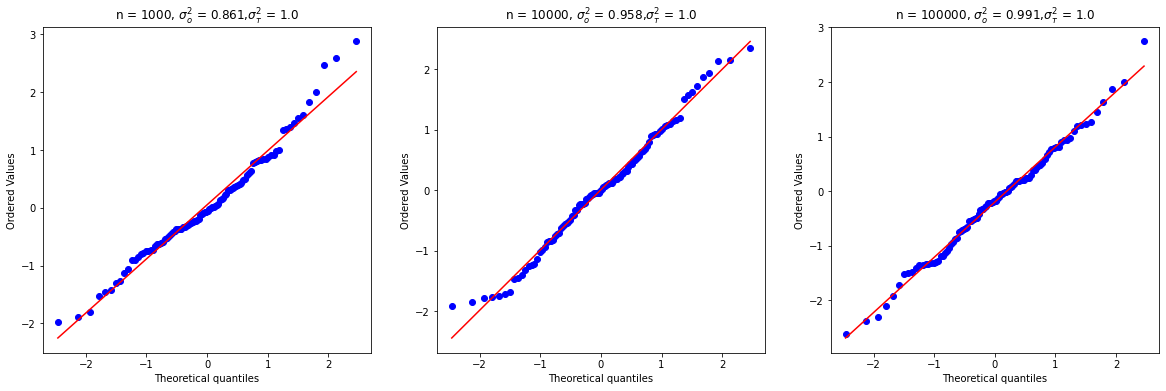

In [20]:
fig,ax = plt.subplots(1,3,figsize = (20,6))
for i in range(3):
    stats.probplot(lhs[i], sparams=(0,lim_std),dist=stats.norm, plot=ax[i])
    ax[i].set_title("n = {}, $\sigma^2_о$ = {:.3},$\sigma^2_т$ = {:.3}".format(sample_sizes[i],lhs_variance[i],lim_std**2))

## Задача 3

In [21]:
sample_size = 100
n_samples = 1000
mu = 3
sigma = 1
X = np.random.laplace(loc = mu,scale=sigma,size = (n_samples,sample_size))
# Метод максимального правдоподобия
MLE_mu = np.median(X,axis = 1)
MLE_sigma = np.mean(abs(X-MLE_mu.reshape(n_samples,-1)),axis = 1)
# Метод моментов
MM_mu = np.mean(X,axis = 1)
MM_sigma= np.sqrt((np.mean(X**2,axis=1)-np.mean(X,axis=1))/2)

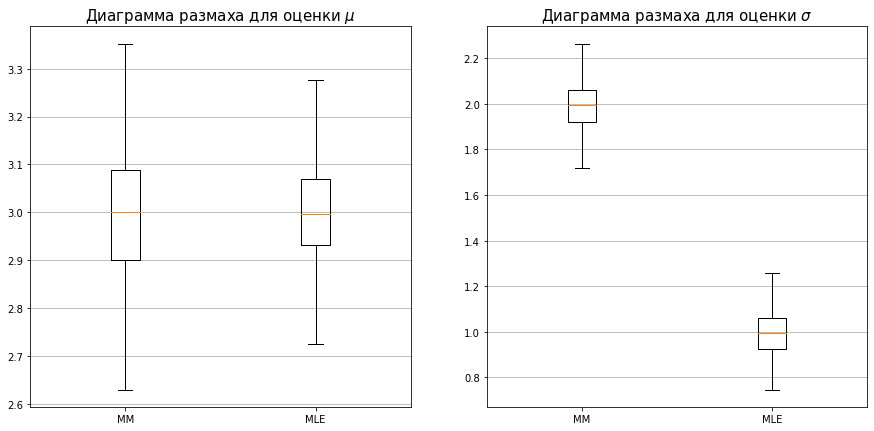

In [22]:
fig,ax = plt.subplots(1,2,figsize = (15,7))
ax[0].boxplot([MM_mu,MLE_mu],labels = ['MM','MLE'],showfliers=False);
ax[0].set_title('Диаграмма размаха для оценки $\mu$',fontsize = 15)
ax[1].boxplot([MM_sigma,MLE_sigma],labels = ['MM','MLE'],showfliers=False);
ax[1].set_title('Диаграмма размаха для оценки $\sigma$',fontsize = 15);
ax[0].grid(axis = 'y')
ax[1].grid(axis = 'y')

Как видно из диаграмм размаха оценки **метода максимального правдоподобия** оказались лучше.

# Задача 4

В задаче используется датасет с ценами акций компании IBM, который можно найти по ссылке: https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs.(файл ibm.us)

In [23]:
data = pd.read_csv("ibm.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


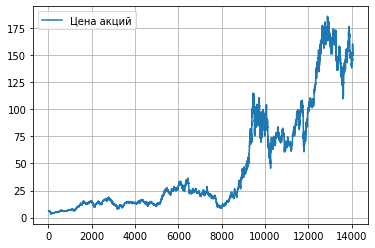

In [24]:
price = data["Open"][len(data["Open"])%10:]# Обрезаю первые несколько дат для кратности 10
n_segments = 10
full_len = len(price)
segment_len = full_len//n_segments
price.plot(grid = True,label = "Цена акций",legend = True);

In [25]:
X = np.array(price).reshape(n_segments,-1) # Делю временной период на 10 равных отрезков
Y = np.log(X[:,1:]/X[:,:-1]) # Лог-доходность
Volatility = np.var(Y,axis= 1) # Волатильность 
Volatility = [Volatility[i//segment_len] for i in range(len(price))] # Константная волатильность на каждом отрезке

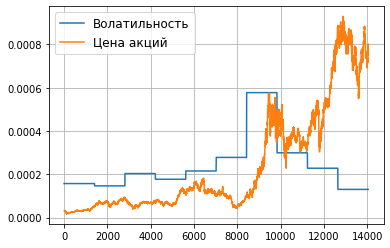

In [26]:
plt.plot(Volatility,label = "Волатильность")
plt.plot(price/200000, label = "Цена акций") # Масштабирую для наложения на Волатильность
plt.grid()
plt.legend(fontsize = 12);

Визуализация подтверждает, что резкие изменения в цене
приводят к резким изменениям волатильности.